# Model Training

## 1.1 - Import Data and required packages

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Import the CSV data as Pandas dataframe

In [6]:
df = pd.read_csv('./data/stud.csv')

Show top 5 data

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [8]:
X = df.drop(columns=['math_score'], axis=1)

In [10]:
y = df['math_score']

In [20]:
# Create column transformer with 3 types of transformers

# numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ('StandardScalar', numerical_transformer, numerical_features)
    ]
)

In [21]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScalar', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [22]:
X = preprocessor.fit_transform(X)

In [25]:
X[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.19399858, 0.39149181])

In [28]:
# Separate dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate function to give all metrics after model training

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square  = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print(f"- Root Mean Squared Error : {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error : {model_train_mae:.4f}")
    print(f"- R2 Score : {model_train_r2:.4f}")

    print('-----------------------------------')

    print('Model performance for Test set')
    print(f"- Root Mean Squared Error : {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error : {model_test_mae:.4f}")
    print(f"- R2 Score : {model_test_r2:.4f}")

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error : 5.3271
- Mean Absolute Error : 4.2694
- R2 Score : 0.8741
-----------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.4186
- Mean Absolute Error : 4.2195
- R2 Score : 0.8793


Lasso
Model performance for Training set
- Root Mean Squared Error : 6.5938
- Mean Absolute Error : 5.2063
- R2 Score : 0.8071
-----------------------------------
Model performance for Test set
- Root Mean Squared Error : 6.5197
- Mean Absolute Error : 5.1579
- R2 Score : 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error : 5.3233
- Mean Absolute Error : 4.2650
- R2 Score : 0.8743
-----------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.3904
- Mean Absolute Error : 4.2111
- R2 Score : 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error : 5.7077
- Mean Absolute Error : 4.5167
- R2 Score : 0.8555

## Result

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879342
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851109
8,AdaBoost Regressor,0.845818
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.751478


Linear regression seems to be optimal choice

## Linear Regression

In [39]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_test_pred)*100
print(f'Accurace of the model is {score:.2f}')

Accurace of the model is 84.58


Plot the y_pred and y_test

Text(0, 0.5, 'Predicted')

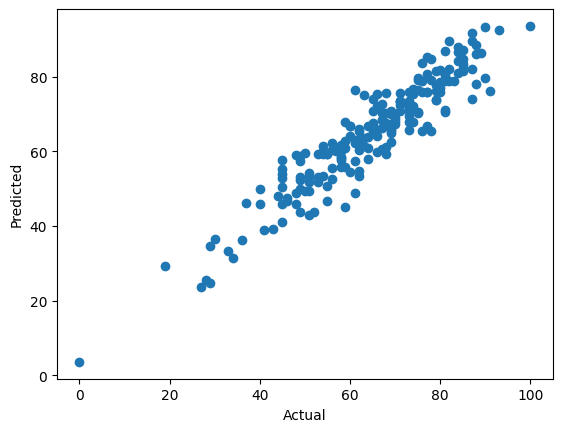

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

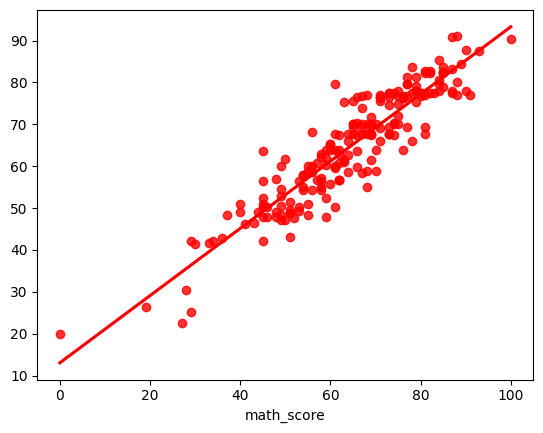

In [41]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color='red')

Difference between Actual and Predicted values

In [42]:
pred_df = pd.DataFrame({'Actual value' : y_test, 'Predicted value': y_pred, 'Difference' : y_test- y_pred})

In [43]:
pred_df

,Actual value,Predicted value,Difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.71875,-2.71875
411,84,87.90625,-3.90625
...,...,...,...
408,52,43.81250,8.18750
332,62,62.40625,-0.40625
208,74,67.75000,6.25000
613,65,66.81250,-1.81250
